<a href="https://colab.research.google.com/github/RodrigoZonzin/complex_networks/blob/main/atv3/trabalho_redes_barabasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors

In [ ]:
redes = []
#n = 1000

for n in range(1000, 11000, 1000):
  G = nx.barabasi_albert_graph(n, m = 4, seed = 42)
  redes.append(G)
  print(n)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [ ]:
def analisar_rede(rede):
  degree = np.array([a[1] for a in nx.degree(rede)])
  degree_avg = degree.mean()
  avg_clustering = nx.average_clustering(rede)
  density = nx.density(rede)
  avg_distance = nx.average_shortest_path_length(rede)

  return {"degree_avg": degree_avg,
          "avg_clustering": avg_clustering,
          "density": density,
          "avg_distance": avg_distance}

In [ ]:
metricas = pd.DataFrame()

In [ ]:
for i, rede in enumerate(redes):
  metricas[(i+1)/10] = analisar_rede(rede)

In [ ]:
metricas = metricas.T

In [ ]:
metricas

,degree_avg,avg_clustering,density,avg_distance
0.1,7.968000,0.033367,0.007976,3.189558
0.2,7.984000,0.019886,0.003994,3.409777
0.3,7.989333,0.015350,0.002664,3.544198
0.4,7.992000,0.011709,0.001998,3.637646
0.5,7.993600,0.009860,0.001599,3.700521
0.6,7.994667,0.008638,0.001333,3.756728
0.7,7.995429,0.007832,0.001142,3.805630
0.8,7.996000,0.007285,0.001000,3.841452
0.9,7.996444,0.006596,0.000889,3.880436
1.0,7.996800,0.006089,0.000800,3.910670


In [ ]:
metricas.columns = ['Grau Médio', 'Clustering Medio', 'Densidade', 'Distancia Media']

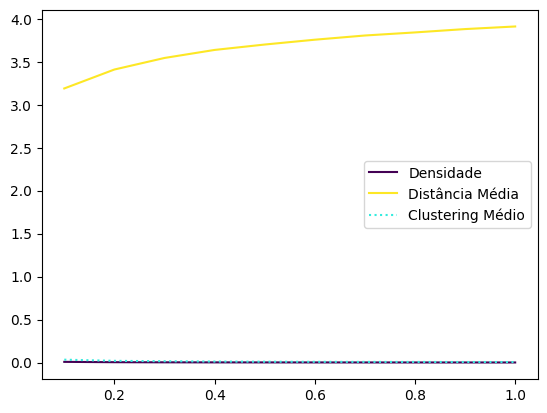

In [ ]:
metricas[['Densidade', 'Distancia Media']].plot(cmap='viridis')
plt.plot(metricas['Clustering Medio'], color='#34ebde', linestyle='dotted')
plt.legend(["Densidade", "Distância Média", "Clustering Médio"])
plt.show()

In [ ]:
correlacao = metricas.corr()

In [ ]:
correlacao

,Grau Médio,Clustering Medio,Densidade,Distancia Media
Grau Médio,1.000000,-0.996342,-1.000000,0.951719
Clustering Medio,-0.996342,1.000000,0.996402,-0.972488
Densidade,-1.000000,0.996402,1.000000,-0.951939
Distancia Media,0.951719,-0.972488,-0.951939,1.000000


In [ ]:
import seaborn as sn

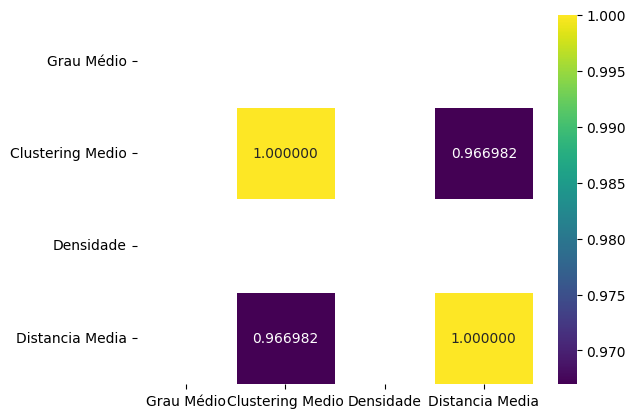

In [ ]:
plot = sn.heatmap(correlacao, annot = True, fmt=".6f", linewidths=.5, cmap = 'viridis')

In [ ]:
pos = nx.spring_layout(redes[4]) #, scale=1, center=None, dim =2)

In [ ]:
centralidade = []
for rede in redes:
  centralidade.append(nx.degree_centrality(rede))

In [ ]:
centralidade_redes = pd.DataFrame(data=centralidade)
centralidade_redes = centralidade_redes.T

In [ ]:
def draw_net(ax, G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, ax=ax, cmap='viridis',
                                   node_color=list(measures),
                                   edgecolors='black',
                                   nodelist=measures.keys(),
                                   node_size=list(measures))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))

    edges = nx.draw_networkx_edges(G, pos, ax=ax)

    ax.set_title(measure_name)
    plt.colorbar(nodes, ax=ax, location='bottom', fraction=0.03, pad=0.03)
    ax.axis('off')

In [ ]:
def draw_net_sozinho(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, ax=ax, cmap='viridis',
                                   node_color=list(measures),
                                   edgecolors='black',
                                   nodelist=measures.keys(),
                                   node_size=list(measures))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))

    edges = nx.draw_networkx_edges(G, pos, ax=ax)

    #ax.set_title(measure_name)
    plt.colorbar(nodes, ax=ax, location='bottom', fraction=0.03, pad=0.03)
    plt.axis('off')

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
axs = ax.flatten()

for i, rede in enumerate(redes):
    draw_net(axs[i], rede, pos, centralidade_redes[i]*10000, f"Centralidade \n p = {(i+1)/10}")

plt.tight_layout()
plt.show()

In [ ]:
def print_logLog(axi, rede, i):
  if i == 0:
    ii = 1
  else:
    ii = i
  # Calculate the frequency counts
  degree_counts = nx.degree_histogram(rede)

  # Normalize the frequency counts to get probabilities
  total_nodes = rede.order()
  degree_probs = [count / total_nodes for count in degree_counts]

  # Plot the degree distribution on a log-log scale
  axi.plot(range(len(degree_probs)), degree_probs, '-', color='#4e8a74')
  #axi.set_xlim(80*ii, 9.5*10**2)
  axi.set_title( f"n = {1000*i}" )
  #axi.set_xlabel('Degree (log)')
  #axi.set_ylabel('Probability (log)')

In [ ]:
#plot the histogram
def printHistogram(axi, dados):
  axi.hist(dados, bins=6, color='#a65c2b', edgecolor='#a65c2b')
  axi.set_title( f"n = {1000+1000*i}" )
  axi.set_xlabel('Degree')
  axi.set_ylabel('Frequencia')
  #plt.show()

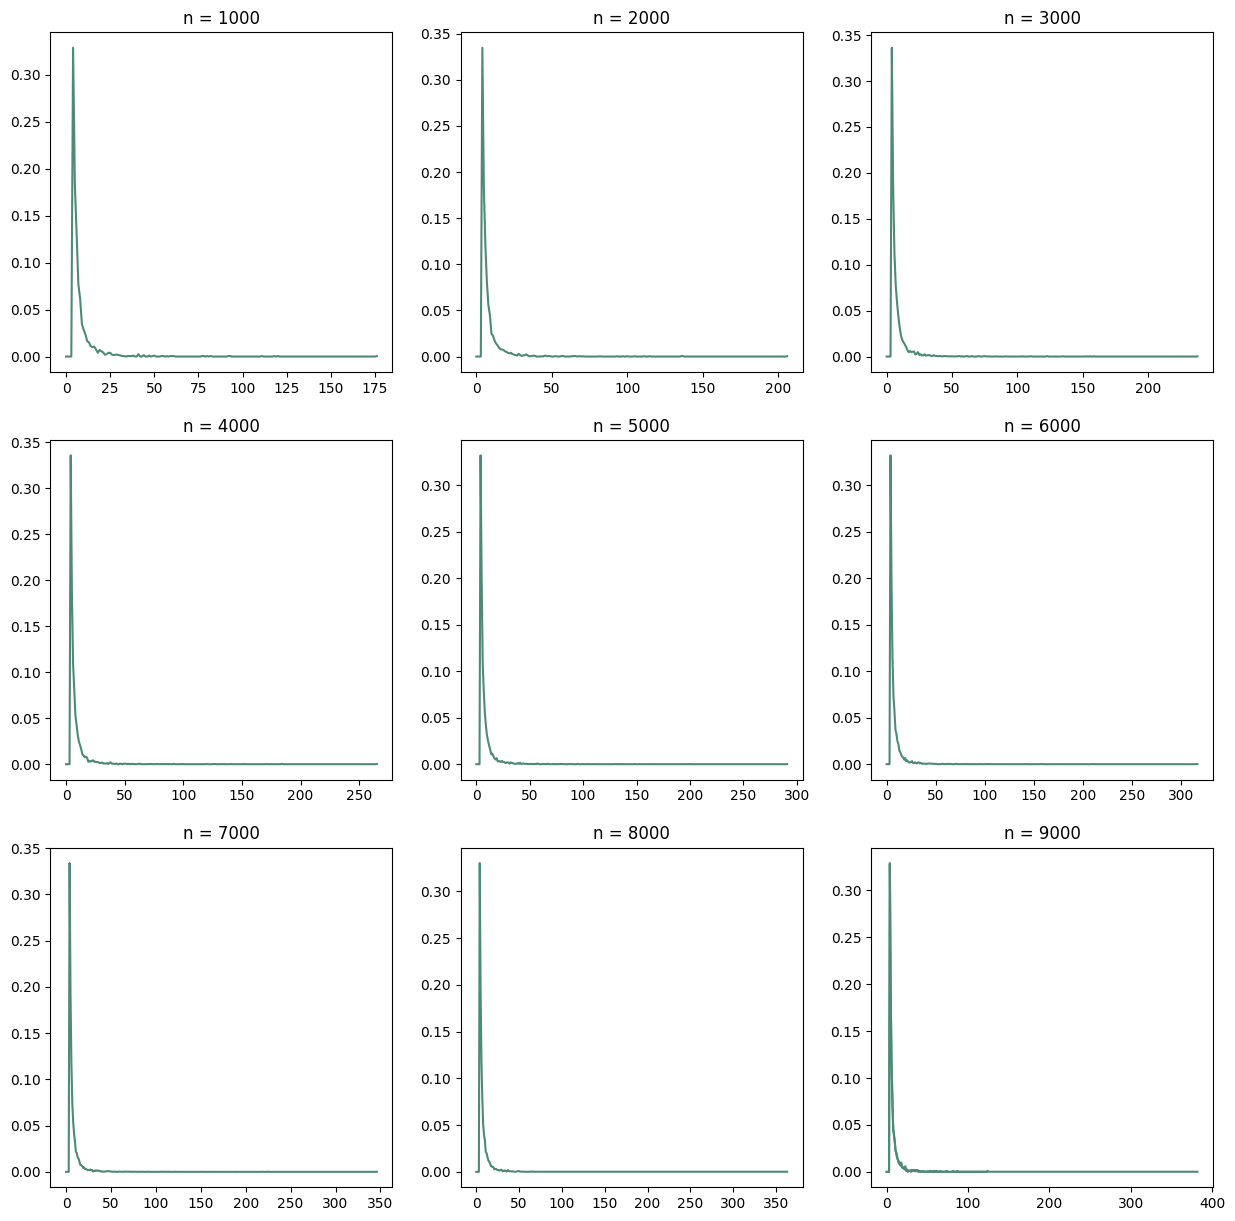

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
axs = ax.flatten()

for i, rede in enumerate(redes):
  print_logLog(axs[i-1], rede, i)
  #printHistogram(axs[i], nx.degree_histogram(rede))

plt.show()

In [ ]:
centralidade_redes[4][:5000]

0       0.053011
1       0.016203
2       0.009402
3       0.017203
4       0.008402
          ...   
4996    0.000800
4997    0.000800
4998    0.000800
4999    0.000800
5000         NaN
Name: 4, Length: 5001, dtype: float64

(-1.205290982425213,
 1.1837529036402703,
 -1.2065922409296035,
 1.1741373926401137)

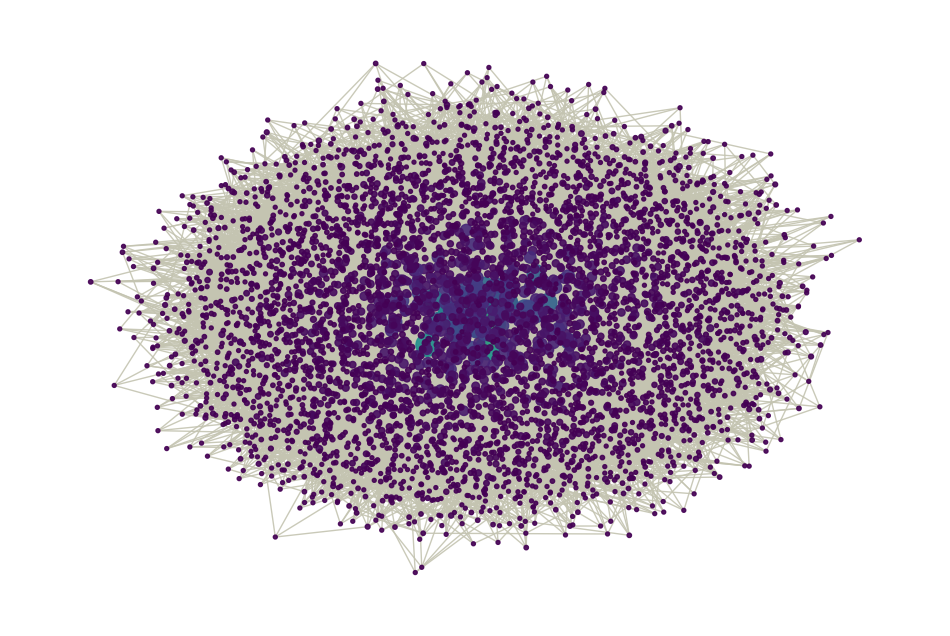

In [ ]:
pos = nx.spring_layout(redes[4])

plt.figure(figsize=(12, 8))
nx.draw_networkx(redes[4],
                 pos = pos,
                 cmap = 'viridis',
                 with_labels = False,
                 alpha = 0.9 ,
                 edge_color = '#c4c4b1',
                 node_color = centralidade_redes[4][:5000]*10000,
                 node_size = centralidade_redes[4][:5000]*10000,
                 )

plt.axis('off')